# Ensemble of classification models

### Import Dependencies

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### Import Dataset

In [89]:
df=pd.read_csv(r"telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,1,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,1,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,0,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,0,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,0,Dissatisfaction,Network reliability


In [90]:
print(f"Number of rows in dataframe : {df.shape[0]}\nNumber of columns in dataframe : {df.shape[1]}")

Number of rows in dataframe : 6589
Number of columns in dataframe : 38


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6589 non-null   object 
 1   Gender                             6589 non-null   object 
 2   Age                                6589 non-null   int64  
 3   Married                            6589 non-null   object 
 4   Number of Dependents               6589 non-null   int64  
 5   City                               6589 non-null   object 
 6   Zip Code                           6589 non-null   int64  
 7   Latitude                           6589 non-null   float64
 8   Longitude                          6589 non-null   float64
 9   Number of Referrals                6589 non-null   int64  
 10  Tenure in Months                   6589 non-null   int64  
 11  Offer                              6589 non-null   objec

In [92]:
df.drop(columns=['Customer ID','City','Zip Code','Latitude','Longitude'],inplace=True)

### Numerical and Object datatype split

In [93]:
num_features = df.select_dtypes(exclude=['object'])
obj_features = df.select_dtypes(include=['object'])

In [94]:
obj_features_col = obj_features.columns

In [95]:
num_features

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,37,0,2,9,42.39,16.0,65.60,593.30,0.00,0,381.51,974.81,1
1,46,0,0,9,10.69,10.0,-4.00,542.40,38.33,10,96.21,610.28,1
2,50,0,0,4,33.65,30.0,73.90,280.85,0.00,0,134.60,415.45,0
3,78,0,1,13,27.82,4.0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,75,0,3,3,7.38,11.0,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,36,0,0,4,2.01,NaN,20.95,85.50,0.00,0,8.04,93.54,0
6585,20,0,0,13,46.68,59.0,55.15,742.90,0.00,0,606.84,1349.74,1
6586,40,0,1,22,16.20,17.0,85.10,1873.70,0.00,0,356.40,2230.10,0
6587,21,0,5,67,2.12,58.0,67.85,4627.65,0.00,0,142.04,4769.69,1


In [96]:
obj_features

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Churn Category,Churn Reason
0,Female,Yes,None,Yes,No,Yes,Cable,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,NaN,NaN
1,Male,No,None,Yes,Yes,Yes,Cable,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,NaN,NaN
2,Male,No,Offer E,Yes,No,Yes,Fiber Optic,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Competitor,Competitor had better devices
3,Male,Yes,Offer D,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Dissatisfaction,Product dissatisfaction
4,Female,Yes,None,Yes,No,Yes,Fiber Optic,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,Female,No,None,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,Competitor,Competitor made better offer
6585,Female,No,Offer D,Yes,No,Yes,DSL,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,NaN,NaN
6586,Male,Yes,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Dissatisfaction,Product dissatisfaction
6587,Male,Yes,Offer A,Yes,No,Yes,Cable,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,NaN,NaN


## Data Visualisation

#### Numerical Features

In [97]:
num_features['Number of Dependents'].value_counts()

0    5042
1     526
2     506
3     491
5       9
4       8
6       3
7       2
9       1
8       1
Name: Number of Dependents, dtype: int64

In [98]:
num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6589 non-null   int64  
 1   Number of Dependents               6589 non-null   int64  
 2   Number of Referrals                6589 non-null   int64  
 3   Tenure in Months                   6589 non-null   int64  
 4   Avg Monthly Long Distance Charges  5945 non-null   float64
 5   Avg Monthly GB Download            5245 non-null   float64
 6   Monthly Charge                     6589 non-null   float64
 7   Total Charges                      6589 non-null   float64
 8   Total Refunds                      6589 non-null   float64
 9   Total Extra Data Charges           6589 non-null   int64  
 10  Total Long Distance Charges        6589 non-null   float64
 11  Total Revenue                      6589 non-null   float

In [99]:
num_features.describe().style.background_gradient(axis=0,cmap='coolwarm')  

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
count,6589.000000,6589.000000,6589.000000,6589.000000,5945.000000,5245.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,46.760510,0.476097,2.020944,34.499772,25.496246,26.225929,65.030695,2432.042243,2.080938,7.169525,798.087251,3235.218082,0.716345
std,16.841362,0.968499,3.024016,23.968734,14.198424,19.565724,31.100727,2265.500080,8.125054,25.803163,853.767972,2854.600036,0.450805
min,19.000000,0.000000,0.000000,1.000000,1.010000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000,0.000000
25%,33.000000,0.000000,0.000000,12.000000,13.140000,13.000000,35.800000,544.550000,0.000000,0.000000,106.680000,835.450000,0.000000
50%,46.000000,0.000000,0.000000,32.000000,25.720000,21.000000,71.050000,1563.900000,0.000000,0.000000,472.680000,2376.450000,1.000000
75%,60.000000,0.000000,3.000000,57.000000,37.690000,30.000000,90.400000,4003.000000,0.000000,0.000000,1275.120000,5106.640000,1.000000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,1.000000


<AxesSubplot: >

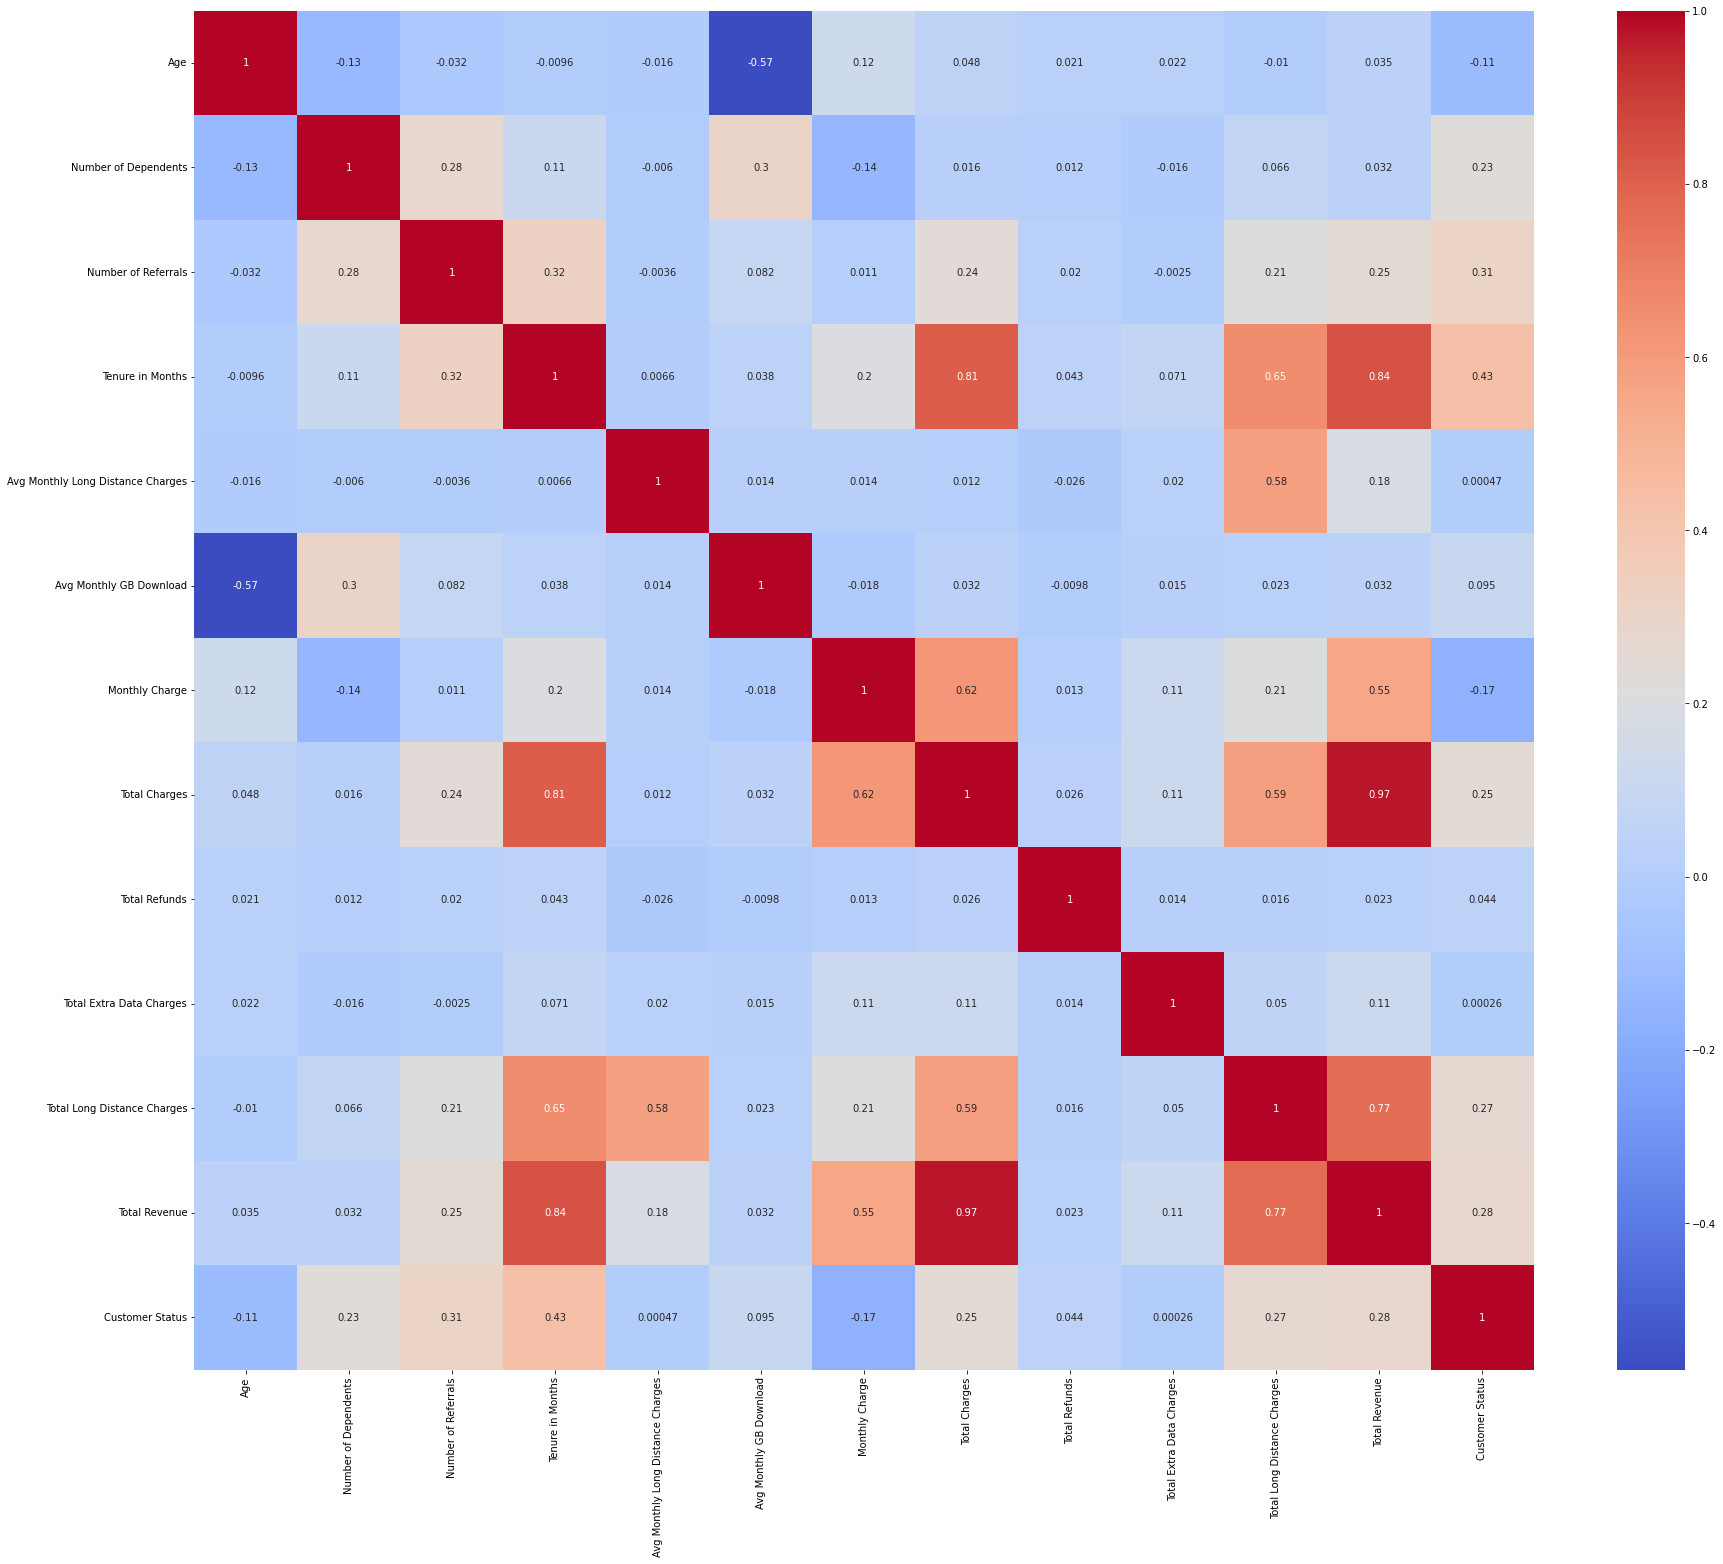

In [100]:
plt.figure(figsize=(30,25))
sns.heatmap(num_features.corr(),annot=True,cmap='coolwarm')

#### Object Features

In [101]:
obj_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  6589 non-null   object
 1   Married                 6589 non-null   object
 2   Offer                   6589 non-null   object
 3   Phone Service           6589 non-null   object
 4   Multiple Lines          5945 non-null   object
 5   Internet Service        6589 non-null   object
 6   Internet Type           5245 non-null   object
 7   Online Security         5245 non-null   object
 8   Online Backup           5245 non-null   object
 9   Device Protection Plan  5245 non-null   object
 10  Premium Tech Support    5245 non-null   object
 11  Streaming TV            5245 non-null   object
 12  Streaming Movies        5245 non-null   object
 13  Streaming Music         5245 non-null   object
 14  Unlimited Data          5245 non-null   object
 15  Cont

In [102]:
obj_features.describe().style.background_gradient(axis=0,cmap='coolwarm')  

,Gender,Married,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Churn Category,Churn Reason
count,6589,6589,6589,6589,5945,6589,5245,5245,5245,5245,5245,5245,5245,5245,5245,6589,6589,6589,1869,1869
unique,2,2,6,2,2,2,3,2,2,2,2,2,2,2,2,3,2,3,5,20
top,Male,Yes,None,Yes,No,Yes,Fiber Optic,No,No,No,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Competitor,Competitor had better devices
freq,3312,3318,3598,5945,3019,5245,2934,3272,2870,2855,3248,2658,2683,2809,4521,3202,3974,3728,841,313


## Data Cleaning

### Numerical Columns

In [103]:
num_features.isna().sum()

Age                                     0
Number of Dependents                    0
Number of Referrals                     0
Tenure in Months                        0
Avg Monthly Long Distance Charges     644
Avg Monthly GB Download              1344
Monthly Charge                          0
Total Charges                           0
Total Refunds                           0
Total Extra Data Charges                0
Total Long Distance Charges             0
Total Revenue                           0
Customer Status                         0
dtype: int64

In [104]:
print(f'{num_features.isna().sum()/len(df)*100}')

Age                                   0.000000
Number of Dependents                  0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Avg Monthly Long Distance Charges     9.773866
Avg Monthly GB Download              20.397632
Monthly Charge                        0.000000
Total Charges                         0.000000
Total Refunds                         0.000000
Total Extra Data Charges              0.000000
Total Long Distance Charges           0.000000
Total Revenue                         0.000000
Customer Status                       0.000000
dtype: float64


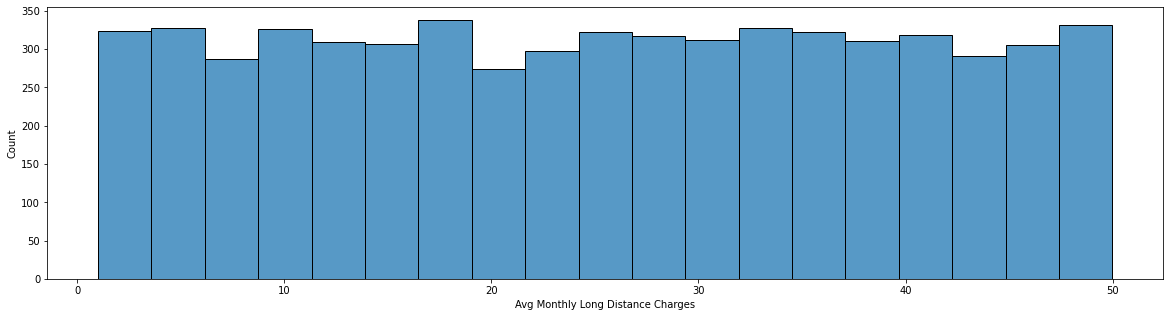

In [105]:
plt.subplots(figsize=(20,5))
sns.histplot(num_features['Avg Monthly Long Distance Charges'])
plt.show()

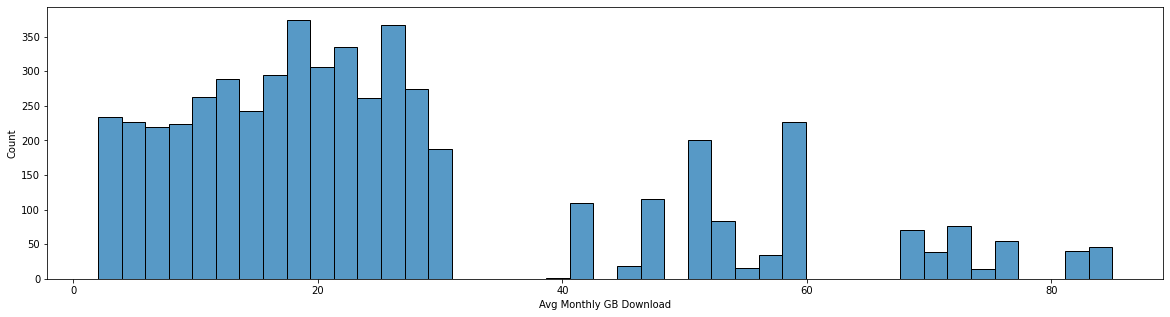

In [106]:
plt.subplots(figsize=(20,5))
sns.histplot(num_features['Avg Monthly GB Download'])
plt.show()

#### Filling Missing Values

In [107]:
num_features['Avg Monthly Long Distance Charges'].fillna(value=num_features['Avg Monthly Long Distance Charges'].mean(),inplace=True)
num_features['Avg Monthly GB Download'].fillna(value=num_features['Avg Monthly GB Download'].mean(),inplace=True)

In [108]:
num_features.isna().sum()

Age                                  0
Number of Dependents                 0
Number of Referrals                  0
Tenure in Months                     0
Avg Monthly Long Distance Charges    0
Avg Monthly GB Download              0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
Customer Status                      0
dtype: int64

### Object Columns

In [109]:
obj_features.isna().sum()

Gender                       0
Married                      0
Offer                        0
Phone Service                0
Multiple Lines             644
Internet Service             0
Internet Type             1344
Online Security           1344
Online Backup             1344
Device Protection Plan    1344
Premium Tech Support      1344
Streaming TV              1344
Streaming Movies          1344
Streaming Music           1344
Unlimited Data            1344
Contract                     0
Paperless Billing            0
Payment Method               0
Churn Category            4720
Churn Reason              4720
dtype: int64

In [110]:
print(f'{obj_features.isna().sum()/len(df)*100}')

Gender                     0.000000
Married                    0.000000
Offer                      0.000000
Phone Service              0.000000
Multiple Lines             9.773866
Internet Service           0.000000
Internet Type             20.397632
Online Security           20.397632
Online Backup             20.397632
Device Protection Plan    20.397632
Premium Tech Support      20.397632
Streaming TV              20.397632
Streaming Movies          20.397632
Streaming Music           20.397632
Unlimited Data            20.397632
Contract                   0.000000
Paperless Billing          0.000000
Payment Method             0.000000
Churn Category            71.634542
Churn Reason              71.634542
dtype: float64


In [111]:
obj_features.drop(columns=['Churn Reason','Churn Category'],inplace=True)

In [112]:
for column in obj_features.columns:
    obj_features[column].fillna(obj_features[column].mode()[0], inplace=True)

In [113]:
obj_features.isna().sum()

Gender                    0
Married                   0
Offer                     0
Phone Service             0
Multiple Lines            0
Internet Service          0
Internet Type             0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Streaming Music           0
Unlimited Data            0
Contract                  0
Paperless Billing         0
Payment Method            0
dtype: int64

## Label Encoding

In [114]:
Label_Encoder = LabelEncoder()
for i in obj_features.select_dtypes(include='object').columns:
    obj_features[i] = Label_Encoder.fit_transform(obj_features[i].astype(str))

In [115]:
obj_features.dtypes

Gender                    int32
Married                   int32
Offer                     int32
Phone Service             int32
Multiple Lines            int32
Internet Service          int32
Internet Type             int32
Online Security           int32
Online Backup             int32
Device Protection Plan    int32
Premium Tech Support      int32
Streaming TV              int32
Streaming Movies          int32
Streaming Music           int32
Unlimited Data            int32
Contract                  int32
Paperless Billing         int32
Payment Method            int32
dtype: object

### Merging DataSet

In [116]:
df_final = pd.concat([obj_features,num_features], axis=1)

In [117]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   int32  
 1   Married                            6589 non-null   int32  
 2   Offer                              6589 non-null   int32  
 3   Phone Service                      6589 non-null   int32  
 4   Multiple Lines                     6589 non-null   int32  
 5   Internet Service                   6589 non-null   int32  
 6   Internet Type                      6589 non-null   int32  
 7   Online Security                    6589 non-null   int32  
 8   Online Backup                      6589 non-null   int32  
 9   Device Protection Plan             6589 non-null   int32  
 10  Premium Tech Support               6589 non-null   int32  
 11  Streaming TV                       6589 non-null   int32

## Train Test Split

In [118]:
x=df_final.iloc[:,:-1]
y=df_final.iloc[:,-1]

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

# Creating Bags

In [120]:
b1_x=x_train.sample(n=2034)
b1_y=y_train[b1_x.index]
b2_x=x_train.sample(n=2034)
b2_y=y_train[b2_x.index]
b3_x=x_train.sample(n=2034)
b3_y=y_train[b3_x.index]
b4_x=x_train.sample(n=2034)
b4_y=y_train[b4_x.index]
b5_x=x_train.sample(n=2034)
b5_y=y_train[b5_x.index]

# Logistic Regression

In [121]:
reg=LogisticRegression()
reg.fit(b1_x,b1_y)

reg_params={'solver':['newton-cg','lbfgs','sag'],'C':np.logspace(-10,2.45,10),'penalty':['l1','l2']}

print("Grid Search:")
grid_reg=GridSearchCV(reg,reg_params,scoring='accuracy',cv=9,n_jobs=-1)
grid_reg.fit(b1_x,b1_y)
print(grid_reg.best_score_)

Grid Search:
0.8466076696165191


# K-Nearest Neighbour [KNN]

In [122]:
knn=KNeighborsClassifier()
knn.fit(b2_x,b2_y)

knn_params={'n_neighbors':np.arange(1,50)}


grid_knn=GridSearchCV(knn,knn_params,scoring='accuracy',cv=9,n_jobs=-1)
grid_knn.fit(b2_x,b2_y)

print(grid_knn.best_score_)

0.7940019665683383


# Naive Bayes

In [123]:
gnb=GaussianNB()
gnb.fit(b3_x,b3_y)

gnb_params={'var_smoothing':np.logspace(5,-7,79)}


grid_gnb=GridSearchCV(gnb,gnb_params,scoring='accuracy',cv=9,n_jobs=-1)
grid_gnb.fit(b3_x,b3_y)

print(grid_gnb.best_score_)

0.7620452310717797


# Decision Tree

In [124]:
dt=DecisionTreeClassifier()
dt.fit(b4_x,b4_y)

dt_params={'criterion':['gini','entropy'],'max_depth':np.arange(1,20),'min_samples_split':np.arange(1,10)
            ,'max_features':np.arange(1,7)}


grid_dt=GridSearchCV(dt,dt_params,scoring='accuracy',cv=9,n_jobs=-1)
grid_dt.fit(b4_x,b4_y)

print(grid_dt.best_score_)

0.8446411012782694


# Support Vector Machine

In [125]:
svc=SVC()
svc.fit(b5_x,b5_y)

print(accuracy_score(svc.predict(x_test),y_test))

print()

0.7627718765806778



# Merging Model

In [127]:
predicted_data=pd.DataFrame()
predicted_data['Logistic Regression']=grid_reg.predict(x_test)
predicted_data['KNN']=grid_knn.predict(x_test)
predicted_data['Naive Bayes']=grid_gnb.predict(x_test)
predicted_data['Decision Tree']=grid_dt.predict(x_test)
predicted_data['Support Vector Machines']=svc.predict(x_test)

In [128]:
predicted_data

,Logistic Regression,KNN,Naive Bayes,Decision Tree,Support Vector Machines
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,0,1,1,0,1
4,1,1,1,1,1
...,...,...,...,...,...
1972,1,1,1,1,1
1973,1,1,1,1,1
1974,1,1,0,1,0
1975,1,1,1,1,1


In [130]:
df1=predicted_data.iloc[0]

In [132]:
l=[]
for i in range(0,len(predicted_data)):
    c=d=0
    pred=0
    for i in predicted_data.iloc[i]:
        if i==0:
            c+=1
        elif i==1:
            d+=1
        if c>d:
            pred=0
        elif d>c:
            pred=1
    l.append(pred)

In [137]:
predicted_data['Final']=l

In [139]:
predicted_data

,Logistic Regression,KNN,Naive Bayes,Decision Tree,Support Vector Machines,Final
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,0,1,1,0,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
1972,1,1,1,1,1,1
1973,1,1,1,1,1,1
1974,1,1,0,1,0,1
1975,1,1,1,1,1,1


In [138]:
from sklearn.metrics import accuracy_score
print(accuracy_score(predicted_data['Final'],y_test))

0.8108244815376834
